In [1]:
##### IMPORTATIONS
import cv2
import pandas as pd
import numpy as np
import sys

from models.ObjectDetection import FaceDetector
from models.FacialLandmarksEstimation import FacialLandmarksEstimator
from models.ObjectTracking import MultiObjectTracker
from models.FacialRecognition import FacialRecognizer
from Pipeline import Pipeline

In [2]:
##### RECOGNITION DATASET
# Import recognition dataset
df = pd.read_pickle('./data/known_peoples.csv')
descriptors = np.array([df['descriptor'].values[i] for i in range(df['descriptor'].values.shape[0])])
names = df['name'].values.reshape((-1, 1))

In [3]:
descriptors.shape, names.shape

((258, 128), (258, 1))

In [4]:
from sklearn.manifold import TSNE

In [5]:
X_embedded = TSNE(n_components=2).fit_transform(descriptors)
X_embedded.shape

(258, 2)

In [6]:
import matplotlib.pyplot as plt

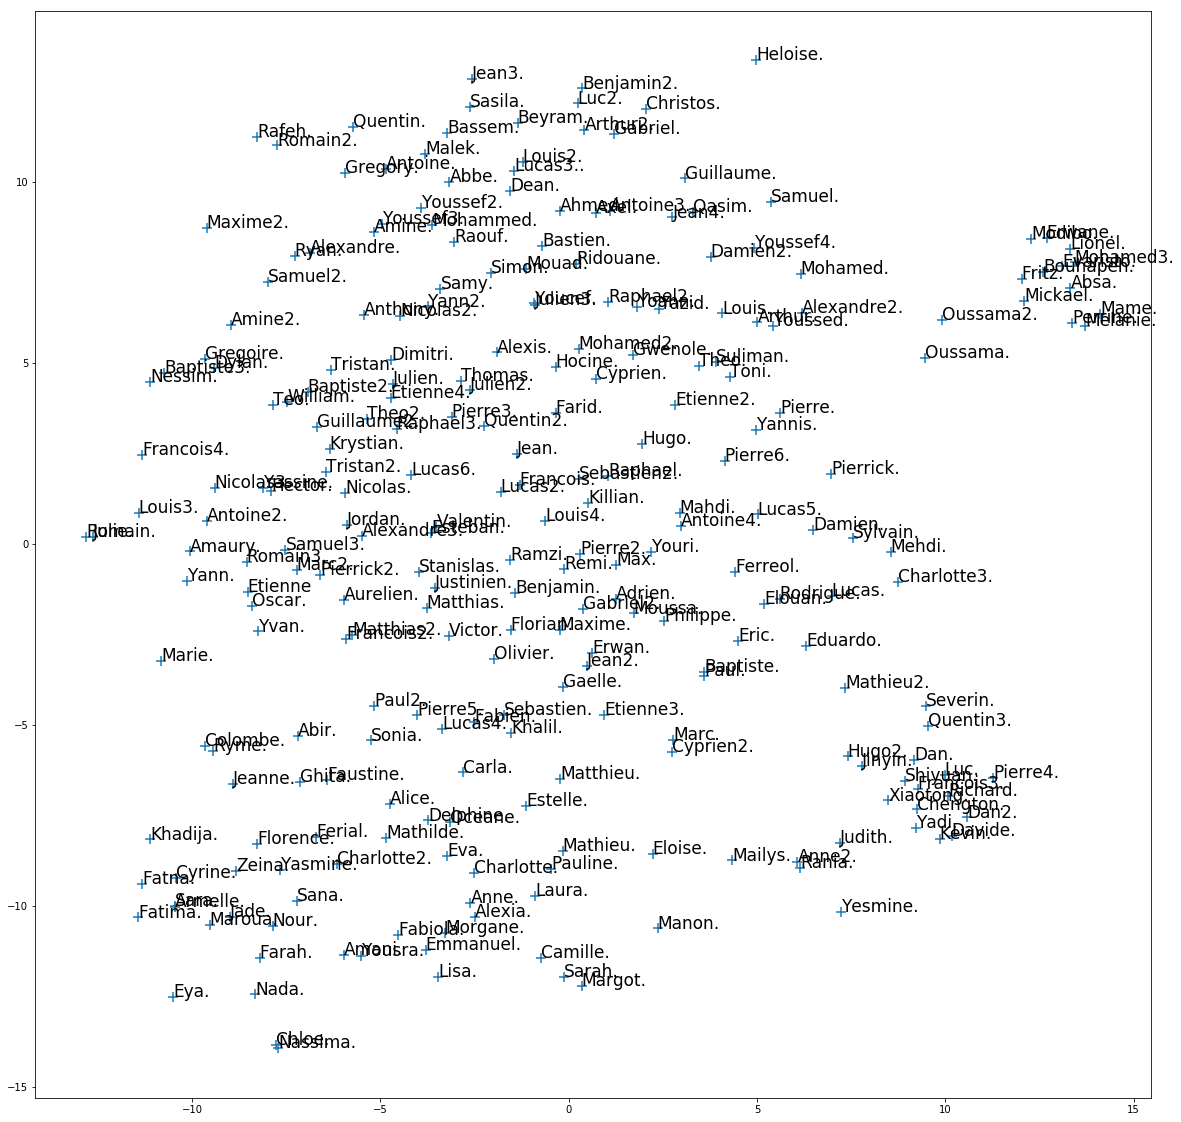

In [15]:
plt.figure(figsize=(20,20))
plt.scatter(X_embedded[:,0], X_embedded[:,1], marker='+', s=100)
for i in range(len(names)):
    plt.annotate(str(names[i,0]), (X_embedded[i,0], X_embedded[i,1]), size=17)
plt.savefig('tsne.jpg')
plt.show()